1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando t=10 s.
¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

--- Resultados a t = 10 s ---
Hermite:   Posición = 778.67 m,  Velocidad = 75.96 m/s
Spline:    Posición = 774.86 m,   Velocidad = 74.16 m/s

Velocidad máxima predicha (Hermite): 80.24 m/s
Velocidad máxima predicha (Spline):  80.68 m/s


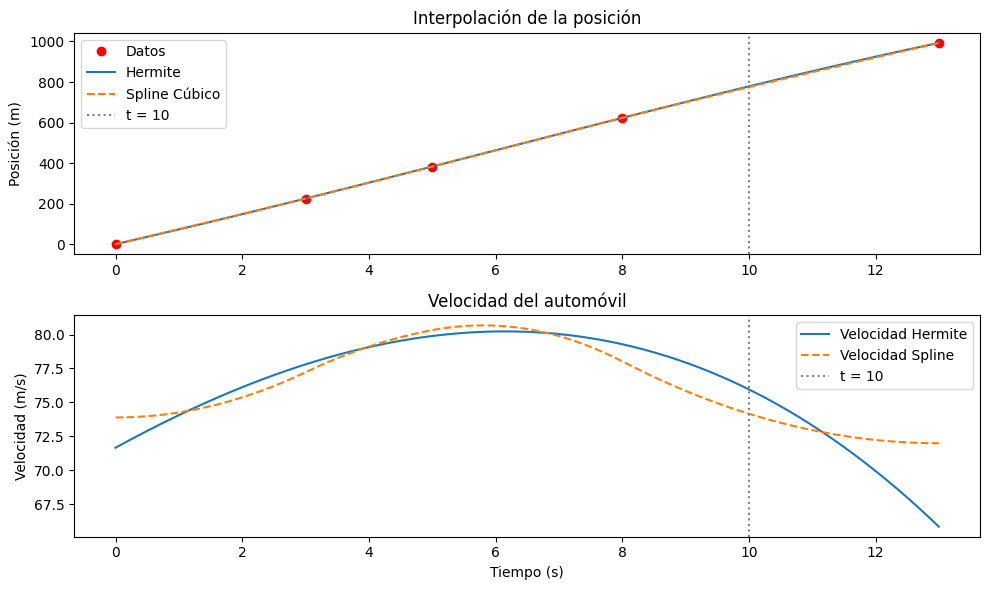

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import KroghInterpolator, CubicSpline

# Datos del problema
tiempos = np.array([0, 3, 5, 8, 13])           # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72])   # m/s

# --- Interpolación de Hermite ---
hermite_interp = KroghInterpolator(tiempos, list(zip(distancias, velocidades)))

# Evaluamos en t = 10
t_eval = 10
pos_hermite = hermite_interp(t_eval)[0]
vel_hermite = hermite_interp.derivative(t_eval)[0]

# Encontrar velocidad máxima predicha por Hermite en el intervalo [0, 13]
t_vals = np.linspace(min(tiempos), max(tiempos), 300)
velocidades_hermite_full = hermite_interp.derivative(t_vals)
velocidades_hermite = velocidades_hermite_full[:, 0] # Extract the first derivative (velocity)
vmax_hermite = np.max(velocidades_hermite)

# --- Interpolación con Splines Cúbicos ---
spline_interp = CubicSpline(tiempos, distancias, bc_type='natural')
spline_velocity = spline_interp.derivative()

# Evaluamos en t = 10
pos_spline = spline_interp(t_eval)
vel_spline = spline_velocity(t_eval)

# Encontrar velocidad máxima predicha por el spline
velocidades_spline = spline_velocity(t_vals)
vmax_spline = np.max(velocidades_spline)

# --- Imprimimos resultados ---
print(f"--- Resultados a t = {t_eval} s ---")
print(f"Hermite:   Posición = {pos_hermite:.2f} m,  Velocidad = {vel_hermite:.2f} m/s")
print(f"Spline:    Posición = {pos_spline:.2f} m,   Velocidad = {vel_spline:.2f} m/s")
print()
print(f"Velocidad máxima predicha (Hermite): {vmax_hermite:.2f} m/s")
print(f"Velocidad máxima predicha (Spline):  {vmax_spline:.2f} m/s")

# --- Gráficas ---
plt.figure(figsize=(10, 6))

# Posición
plt.subplot(2, 1, 1)
plt.plot(tiempos, distancias, 'ro', label='Datos')
plt.plot(t_vals, hermite_interp(t_vals)[:, 0], label='Hermite')
plt.plot(t_vals, spline_interp(t_vals), '--', label='Spline Cúbico')
plt.axvline(t_eval, color='gray', linestyle=':', label=f't = {t_eval}')
plt.title('Interpolación de la posición')
plt.ylabel('Posición (m)')
plt.legend()

# Velocidad
plt.subplot(2, 1, 2)
plt.plot(t_vals, velocidades_hermite, label='Velocidad Hermite')
plt.plot(t_vals, velocidades_spline, '--', label='Velocidad Spline')
plt.axvline(t_eval, color='gray', linestyle=':', label=f't = {t_eval}')
plt.title('Velocidad del automóvil')
plt.ylabel('Velocidad (m/s)')
plt.xlabel('Tiempo (s)')
plt.legend()

plt.tight_layout()
plt.show()

2.

Los valores de la aceleración gravitacional g dependen de la altitud y
 según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²

g(5000 m) ≈ 9.794654 m/s²
g(42000 m) ≈ 9.681859 m/s²
g(90000 m) ≈ 9.538416 m/s²


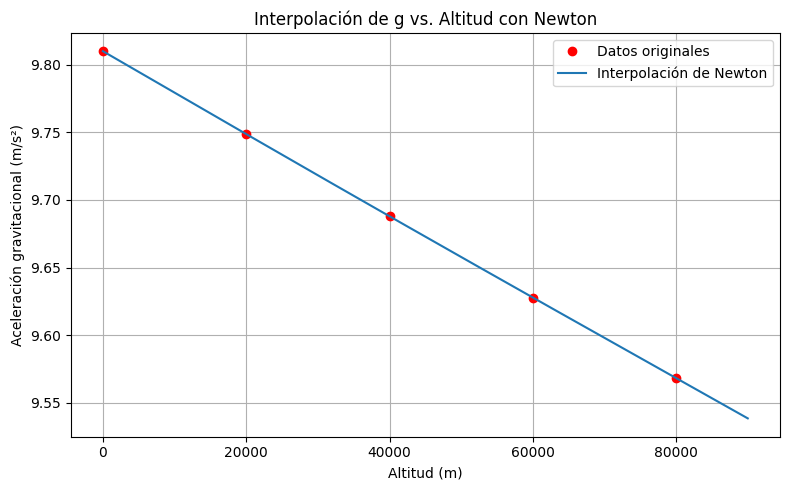

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- Datos del problema ---
y_vals = np.array([0, 20000, 40000, 60000, 80000], dtype=float)  # altitudes (m)
g_vals = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682])       # aceleración (m/s²)

# --- Función para calcular diferencias divididas y construir el polinomio de Newton ---
def newton_coeffs(x, y):
    """Calcula los coeficientes de diferencias divididas"""
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef

def newton_eval(x_data, coeffs, x):
    """Evalúa el polinomio de Newton con los coeficientes calculados"""
    n = len(coeffs) - 1
    p = coeffs[n]
    for k in range(1, n+1):
        p = coeffs[n-k] + (x - x_data[n-k]) * p
    return p

# --- Construcción del polinomio ---
coeffs = newton_coeffs(y_vals, g_vals)

# --- Estimar g para las altitudes deseadas ---
altitudes_objetivo = [5000, 42000, 90000]
for alt in altitudes_objetivo:
    g_interp = newton_eval(y_vals, coeffs, alt)
    print(f"g({alt} m) ≈ {g_interp:.6f} m/s²")

# --- Graficar la función interpolante y los datos originales ---
y_interp = np.linspace(0, 90000, 300)
g_interp = [newton_eval(y_vals, coeffs, yi) for yi in y_interp]

plt.figure(figsize=(8, 5))
plt.plot(y_vals, g_vals, 'ro', label='Datos originales')
plt.plot(y_interp, g_interp, label='Interpolación de Newton')
plt.xlabel('Altitud (m)')
plt.ylabel('Aceleración gravitacional (m/s²)')
plt.title('Interpolación de g vs. Altitud con Newton')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3.

La densidad del aire ρ depende de la temperatura T
 como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3

Estimaciones de densidad del aire:
ρ(250 K) ≈ 1.397533 kg/m³
ρ(800 K) ≈ 0.496409 kg/m³
ρ(3000 K) ≈ 1561.165867 kg/m³


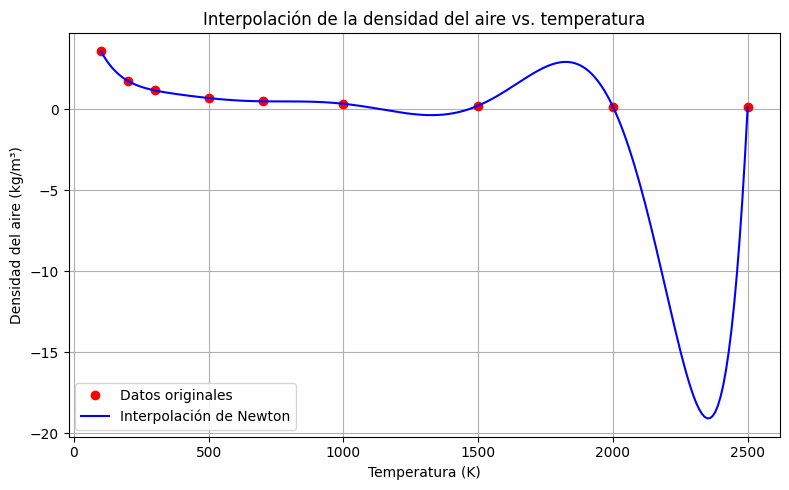

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Datos del problema ---
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500], dtype=float)  # Temperatura (K)
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394])  # Densidad (kg/m^3)

# --- Funciones auxiliares para interpolación de Newton ---
def newton_coeffs(x, y):
    """Calcula los coeficientes de diferencias divididas de Newton"""
    n = len(x)
    coef = np.copy(y).astype(float)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j-1:n-1]) / (x[j:n] - x[0:n-j])
    return coef

def newton_eval(x_data, coeffs, x):
    """Evalúa el polinomio de Newton en x dado x_data y coeficientes"""
    n = len(coeffs) - 1
    p = coeffs[n]
    for k in range(1, n+1):
        p = coeffs[n-k] + (x - x_data[n-k]) * p
    return p

# --- Construir el polinomio ---
coef_newton = newton_coeffs(T, rho)

# --- Estimaciones para puntos específicos ---
T_estimadas = [250, 800, 3000]
print("Estimaciones de densidad del aire:")
for temp in T_estimadas:
    rho_interp = newton_eval(T, coef_newton, temp)
    print(f"ρ({temp} K) ≈ {rho_interp:.6f} kg/m³")

# --- Evaluación para T de 100 a 2500 con paso 10 ---
T_densa = np.arange(100, 2501, 10)
rho_densa = [newton_eval(T, coef_newton, temp) for temp in T_densa]

# --- Graficar resultados ---
plt.figure(figsize=(8, 5))
plt.plot(T, rho, 'ro', label='Datos originales')
plt.plot(T_densa, rho_densa, 'b-', label='Interpolación de Newton')
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad del aire (kg/m³)')
plt.title('Interpolación de la densidad del aire vs. temperatura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4.

Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 Ωa 0 C y cambia alrededor de 0.39 Ω/C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

A continuación se presentan mediciones tomadas de dicho circuito, con R1=R2=5
 kΩ y R3=120Ω:

resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
Un termómetro de resistencia de platino estándar de 100 Ω
 tiene una resistencia de 139.27 Ω a 100 C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida

Voltaje estimado con R = 139.27 Ω: -0.37016 V (Lagrange)
Resistencia estimada cuando el voltaje es 0 V: 120.00 Ω (CubicSpline)


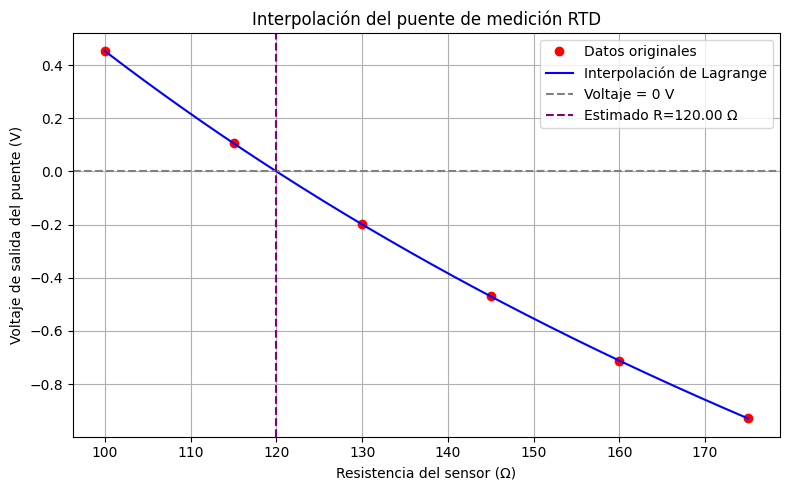

In [10]:
from scipy.interpolate import lagrange, CubicSpline

# --- Datos proporcionados ---
resistencia = np.array([100, 115, 130, 145, 160, 175], dtype=float)  # (Ω)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # (V)

# --- Interpolación con Lagrange ---
pol_lagrange = lagrange(resistencia, voltaje)
voltaje_139_27 = pol_lagrange(139.27)
print(f"Voltaje estimado con R = 139.27 Ω: {voltaje_139_27:.5f} V (Lagrange)")

# --- Interpolación inversa: Voltaje -> Resistencia usando splines cúbicos ---
spline_inv = CubicSpline(voltaje[::-1], resistencia[::-1])  # Revertimos para orden creciente de x
resistencia_cero = spline_inv(0)
print(f"Resistencia estimada cuando el voltaje es 0 V: {resistencia_cero:.2f} Ω (CubicSpline)")

# --- Graficar interpolación y datos ---
x_interp = np.linspace(min(resistencia), max(resistencia), 300)
y_interp = pol_lagrange(x_interp)

plt.figure(figsize=(8, 5))
plt.plot(resistencia, voltaje, 'ro', label='Datos originales')
plt.plot(x_interp, y_interp, 'b-', label='Interpolación de Lagrange')
plt.axhline(0, color='gray', linestyle='--', label='Voltaje = 0 V')
plt.axvline(resistencia_cero, color='purple', linestyle='--', label=f'Estimado R={resistencia_cero:.2f} Ω')
plt.xlabel('Resistencia del sensor (Ω)')
plt.ylabel('Voltaje de salida del puente (V)')
plt.title('Interpolación del puente de medición RTD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



5.

El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

Longitud de onda estimada para n = 1.520 (CubicSpline): 4482.27 Å
Longitud de onda estimada para n = 1.520 (Interp1D):    4498.87 Å


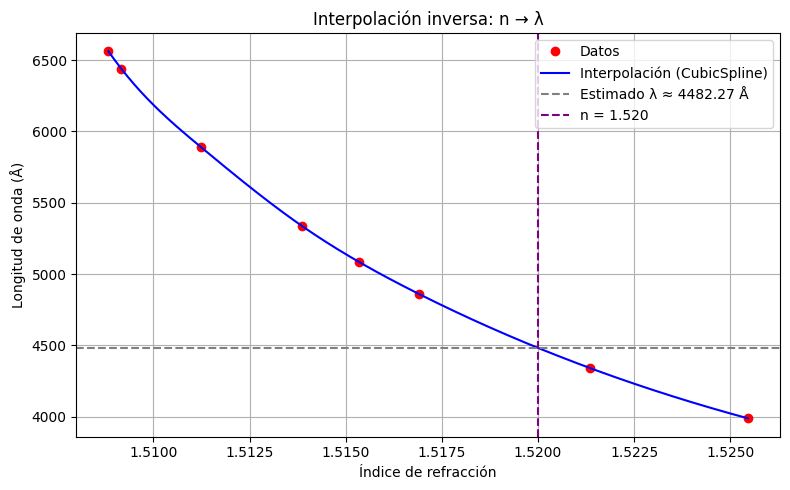

In [11]:
from scipy.interpolate import CubicSpline, interp1d

# --- Datos ---
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

# --- Ordenamos los datos por índice de refracción creciente para invertir la interpolación ---
orden = np.argsort(indice_refraccion)
n_refr = indice_refraccion[orden]
long_onda = lambda_angstrom[orden]

# --- Interpolación inversa: índice de refracción -> longitud de onda ---
spline = CubicSpline(n_refr, long_onda)
interp_lineal = interp1d(n_refr, long_onda)

# --- Valor objetivo ---
n_objetivo = 1.520
lambda_estimado = spline(n_objetivo)
lambda_estimado_lineal = interp_lineal(n_objetivo)

# --- Resultados ---
print(f"Longitud de onda estimada para n = 1.520 (CubicSpline): {lambda_estimado:.2f} Å")
print(f"Longitud de onda estimada para n = 1.520 (Interp1D):    {lambda_estimado_lineal:.2f} Å")

# --- Gráfico ---
x_vals = np.linspace(min(n_refr), max(n_refr), 300)
y_vals = spline(x_vals)

plt.figure(figsize=(8,5))
plt.plot(indice_refraccion, lambda_angstrom, 'ro', label='Datos')
plt.plot(x_vals, y_vals, 'b-', label='Interpolación (CubicSpline)')
plt.axhline(lambda_estimado, color='gray', linestyle='--', label=f'Estimado λ ≈ {lambda_estimado:.2f} Å')
plt.axvline(n_objetivo, color='purple', linestyle='--', label='n = 1.520')
plt.xlabel('Índice de refracción')
plt.ylabel('Longitud de onda (Å)')
plt.title('Interpolación inversa: n → λ')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()